In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

data=pd.read_csv("~/datacsv/HousingData.csv")

In [30]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [31]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [32]:
x = data.iloc[:,0:13].values
y = data.iloc[:,13].values

In [33]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00]])

In [34]:
y

array([24. , 21.6, 34.7, 33.4, 28.7, 27.1, 16.5, 15. , 18.9, 21.7, 20.4,
       19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9,
       16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2, 13.1, 13.5, 21. , 24.7,
       30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 20. , 14.4, 19.4, 19.7, 25. ,
       18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. ,
       23.5, 19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 21.4, 20. , 20.8,
       21.2, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 23.6, 28.7, 22.6,
       22. , 25. , 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5,
       19.2, 22. , 20.3, 20.5, 18.8, 21.4, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 15.6, 18.1, 17.4, 17.1, 17.8, 14. , 14.4, 13.4, 15.6, 11.8,
       13.8, 15.4, 19.6, 19.4, 17. , 13.1, 24.3, 23.3, 27. , 50. , 50. ,
       22.7, 25. , 50. , 23.8, 22.3, 17.4, 19.1, 23.1, 22.6, 29.4, 23.2,
       29.9, 37.2, 39.8, 36.2, 37.9, 26.4, 29.6, 32

In [35]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [37]:
data.shape

(394, 14)

In [38]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
# split into train test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(315, 13) (79, 13) (315,) (79,)


In [41]:
x_train

array([[4.68400e-02, 0.00000e+00, 3.41000e+00, ..., 1.78000e+01,
        3.92180e+02, 8.81000e+00],
       [5.26930e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.82000e+02, 4.63000e+00],
       [4.42228e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.31290e+02, 2.13200e+01],
       ...,
       [1.20482e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.91550e+02, 1.41000e+01],
       [6.44405e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        9.79500e+01, 1.20300e+01],
       [1.30100e-02, 3.50000e+01, 1.52000e+00, ..., 1.55000e+01,
        3.94740e+02, 5.49000e+00]])

In [42]:
y_train

array([22.6, 50. , 19.1, 21. , 14.9, 16.3, 21. , 12.7, 15. , 21.9, 24.8,
       29. , 29.4, 16.5, 10.9,  8.5, 17.1, 19.8, 23.3,  6.3, 26.6, 34.7,
       14.3, 20. , 20. , 21.6, 20.2, 23.1, 22.7, 20.6, 42.8, 20.2, 18.7,
        9.7, 25. , 10.4, 11. , 14.1, 50. , 18.5, 20.8, 50. , 29.9, 14.4,
       50. , 17.2, 19. , 21.1, 12.5, 29.1, 11.8, 16.2, 22.8, 21.4, 25. ,
       22.8, 34.6, 19.5, 30.3, 24.4,  7.4, 14.9, 18.9, 19.5, 19.3, 36.5,
       26.6,  9.6, 10.2, 23.1, 22.2, 19.6, 23. , 43.5, 30.1, 23.9, 24.3,
       17.9, 28. ,  7.5, 17.5, 22.3, 29. , 19.1, 15.2, 26.2, 25. , 22.8,
       25.3, 15.6, 21.4, 23.1, 24.6, 11.8, 20.6, 10.5, 24.8, 20. , 20.4,
       21.2, 12. , 21.6, 23.7, 19.6, 22.6, 17.6, 19.3, 18.2, 14.3, 16.5,
       19.4, 20.9, 16.1, 18.1, 21.2, 13.3, 16.6, 24.7, 17.4, 24.7, 50. ,
       23.3, 17.8, 13.8, 18.3, 33.8, 24. , 50. , 28.6, 22.2, 50. , 24.5,
       37. , 19.1, 23.8, 14.8, 11.3, 13.5, 13.8, 24.3, 32.4, 22.2, 15.6,
       17.4, 16.1, 21.7, 13.1, 18.8, 22.5, 31.7, 31

In [43]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train = mc.fit_transform( x_train)
X_test = mc.fit_transform( x_test)

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=104, activation='relu', input_dim=13))
model.add(Dropout(rate=0.1))

# Building second layer
model.add(Dense(units=52,activation ='relu'))
model.add(Dropout(rate=0.1))

# Building third layer
model.add(Dense(units=26,activation ='relu'))
model.add(Dropout(rate=0.1))

#Adding outer layer
model.add(Dense(units = 1, activation='linear'))

# compile the model
model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 104)               1456      
                                                                 
 dropout (Dropout)           (None, 104)               0         
                                                                 
 dense_7 (Dense)             (None, 52)                5460      
                                                                 
 dropout_1 (Dropout)         (None, 52)                0         
                                                                 
 dense_8 (Dense)             (None, 26)                1378      
                                                                 
 dropout_2 (Dropout)         (None, 26)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [50]:
#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=200)

#train model:
history = model.fit(x_train, y_train,
 epochs=200,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/200
8/8 [==============================] - 0s 14ms/step - loss: 22.0570 - val_loss: 21.2937
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 21.3276 - val_loss: 20.4489
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 20.3571 - val_loss: 19.1667
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 18.7333 - val_loss: 17.1962
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 16.3936 - val_loss: 14.4456
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 13.2202 - val_loss: 10.8673
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 9.9851 - val_loss: 8.4278
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 9.1877 - val_loss: 8.4330
Epoch 9/200
8/8 [==============================] - 0s 4ms/step - loss: 9.1193 - val_loss: 7.7179
Epoch 10/200
8/8 [==============================] - 0s 4ms/step - loss: 8.4724 - val_loss: 6.9501
Epoch 11/200
8/8

In [21]:
#model.fit(X_train, y_train,epochs=100,batch_size=32)

In [51]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


dict_keys(['loss', 'val_loss'])


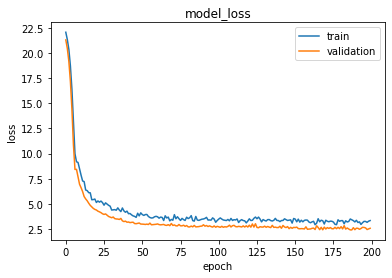

In [52]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [53]:
#evaluate the result
print('Evaluation on test data')
results = model.evaluate(x_train, y_train)
print('mae: ', results)

Evaluation on test data
10/10 [==============================] - 0s 665us/step - loss: 2.1455
mae:  2.1455142498016357


In [54]:
data.MEDV.describe()

count    394.000000
mean      22.359645
std        9.142979
min        5.000000
25%       16.800000
50%       21.050000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [55]:
#mae/mean:  error is 9 precent

2.1/22.35

0.09395973154362416